In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wbgapi as wb

pd.options.display.float_format = '{:,.2f}'.format

In [5]:
wb.series.info() # find dworld bank data by search term and ind the ID
# metadata = wb.series.metadata.get(indicator_code) # load metadata
# metadata

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


# Military Spending

In [121]:
def get_mil_spending_data():
    mil_con = pd.read_csv("./data/milspending.csv")
    mil_melt = mil_con.melt(id_vars='Country',var_name='Year', value_name='Military Spending in constant $').sort_values('Year')
    return mil_melt

mil_melt = get_mil_spending_data()
mil_melt

,Country,Year,Military Spending in constant $
0,United States of America,2000,"503,680.10"
1,China,2000,"45,586.10"
2,Russia,2000,"22,839.80"
3,France,2000,"48,554.40"
4,Germany,2000,"46,431.40"
...,...,...,...
182,Israel,2022,"23,308.20"
177,China,2022,"297,999.00"
176,United States of America,2022,"811,591.20"
178,Russia,2022,"71,981.10"


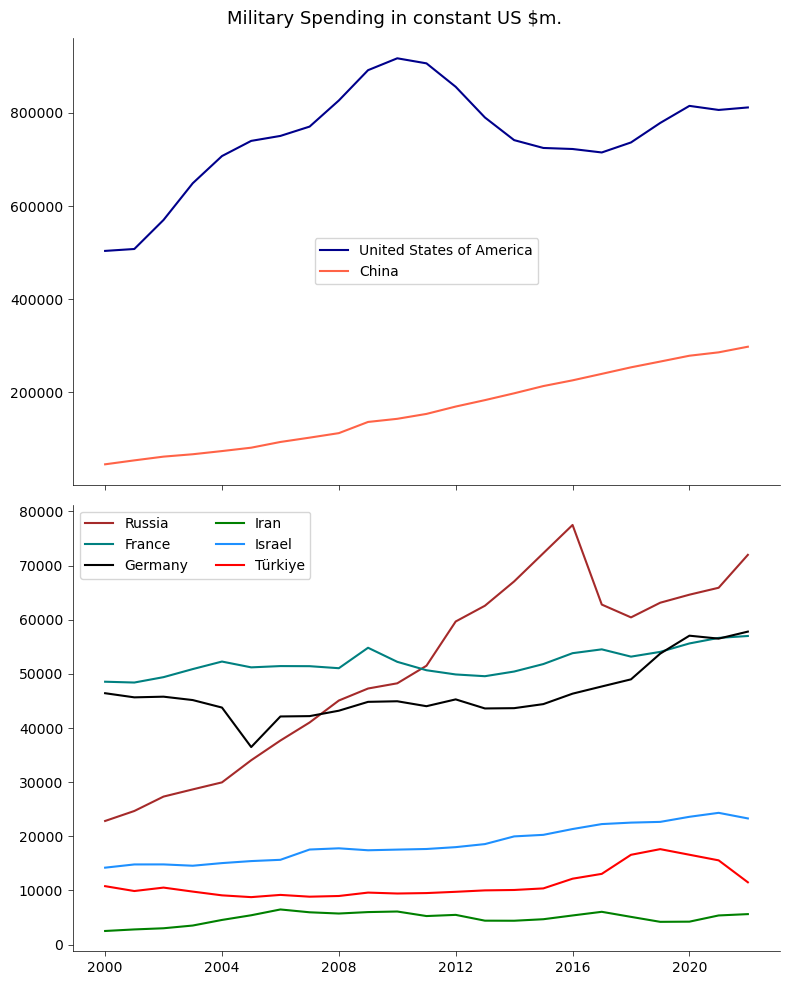

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mil_con = pd.read_csv("./data/milspending.csv")
mil_melt = mil_con.melt(id_vars='Country',var_name='Year', value_name='Military Spending in constant $').sort_values('Year')

# Combine data for China and US
us_china_data = mil_melt[mil_melt["Country"].isin(["United States of America", "China"])]

# Data for other countries
other_data = mil_melt[~mil_melt["Country"].isin(["United States of America", "China"])]

# Define a custom color palette for each country
colors = {
    "United States of America": "darkblue",
    "China": "tomato",
    "Germany": "black",
    "Iran": "g",
    "Türkiye": "r",
    "France": "teal",
    "Israel": "dodgerblue",
    "Russia": "brown"
}


# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Plot for China and US
sns.lineplot(
    data=us_china_data,
    x="Year",
    y="Military Spending in constant $",
    hue="Country",
    palette=colors,
    ax=axes[0],
)
axes[0].legend().set_title(None)  # Remove legend title
axes[0].legend(loc='center', frameon=True)  # Set legend location to 'best' and turn off frame
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].set_ylabel("")
    
    
spine_width = 0.5
for spine in axes[0].spines.values():
    spine.set_linewidth(spine_width)
axes[0].tick_params(axis="both", width=spine_width)

# Plot for other countries
sns.lineplot(
    data=other_data,
    x="Year",
    y="Military Spending in constant $",
    hue="Country",
    palette=colors,
    ax=axes[1],
)
axes[1].legend().set_title(None)  # Remove legend title
axes[1].legend(loc='upper left', frameon=True, ncol=2)  # Set legend location to 'best' and two columns
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

spine_width = 0.5
for spine in axes[1].spines.values():
    spine.set_linewidth(spine_width)
axes[1].tick_params(axis="both", width=spine_width)


# Set x-axis ticks every 4th year
for ax in axes:
    ax.set_xticks(ax.get_xticks()[::2])
    
plt.suptitle("Military Spending in constant US $m.", fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
def get_data(country_list, indicator_code):
    """fetches data from worldbank by indicator code and country list from 1990 onwards"""
    df = wb.data.DataFrame(indicator_code, country_list, mrv=33)
    df.columns = [col.replace("YR", "") for col in df.columns]
    df.reset_index(inplace=True)
    df = df.melt(id_vars="economy", var_name="Year", value_name="y").sort_values(
        "economy"
    )
    return df

In [14]:
help(wb.data.fetch)

Help on function fetch in module wbgapi.data:

fetch(series, economy='all', time='all', mrv=None, mrnev=None, skipBlanks=False, labels=False, skipAggs=False, numericTimeKeys=False, params={}, db=None, **dimensions)
    Retrieve rows of data for the current database

    Arguments:
        series:             a series identifier or list-like, e.g., SP.POP.TOTL

        economy:            an economy identifier or list-like, e.g., 'BRA' or ['USA', 'CAN', 'MEX']

        time:               a time identifier or list-like, e.g., 'YR2015' or range(2010,2020).
                            Both element keys and values are acceptable

        mrv:                return only the specified number of most recent values (same time period for all economies)

        mrnev:              return only the specified number of non-empty most recent values (time period varies)

        skipBlanks:         skip empty observations

        labels:             include both dimension id and name (e.g., ZWE & Z

# Universal plot function

## graph_objects without pandas

In [162]:
help(wb.data.fetch)

Help on function fetch in module wbgapi.data:

fetch(series, economy='all', time='all', mrv=None, mrnev=None, skipBlanks=False, labels=False, skipAggs=False, numericTimeKeys=False, params={}, db=None, **dimensions)
    Retrieve rows of data for the current database

    Arguments:
        series:             a series identifier or list-like, e.g., SP.POP.TOTL

        economy:            an economy identifier or list-like, e.g., 'BRA' or ['USA', 'CAN', 'MEX']

        time:               a time identifier or list-like, e.g., 'YR2015' or range(2010,2020).
                            Both element keys and values are acceptable

        mrv:                return only the specified number of most recent values (same time period for all economies)

        mrnev:              return only the specified number of non-empty most recent values (time period varies)

        skipBlanks:         skip empty observations

        labels:             include both dimension id and name (e.g., ZWE & Z

In [108]:
indicator_code = "BX.TRF.PWKR.CD.DT"
country_list = ["AFG", "UGA", "TZA", "TON"]


def get_data_dict2(indicator_code, country_list):
    '''get data avoiding pandas'''
    result = {'economy': [], 'time': [], 'value': []}
    for item in wb.data.fetch(indicator_code, country_list, numericTimeKeys=True, skipAggs=True):
        result['economy'].append(item['economy'])
        result['time'].append(item['time'])
        result['value'].append(item['value'])
    return result

get_data_dict2(indicator_code, country_list)

{'economy': ['TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TON',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',
  'TZA',

In [187]:
def get_data_dict(indicator_code, country_list):
    data_dict = {}

    for item in wb.data.fetch(indicator_code, country_list, range(1990, 2020), skipAggs=True, numericTimeKeys=True):
        country_code = item['economy']
        value = item['value']
        year = item['time']
        
        if country_code not in data_dict:
            data_dict[country_code] = {"dates": [], "values": []}
        
        # Append the data
        data_dict[country_code]["dates"].append(year)
        data_dict[country_code]["values"].append(value)

    # Sort the dates and values together
    for country_code, data in data_dict.items():
        sorted_data = sorted(zip(data["dates"], data["values"]))
        data_dict[country_code]["dates"], data_dict[country_code]["values"] = map(list, zip(*sorted_data))

    return data_dict

{'TON': {'dates': [1990,
   1991,
   1992,
   1993,
   1994,
   1995,
   1996,
   1997,
   1998,
   1999,
   2000,
   2001,
   2002,
   2003,
   2004,
   2005,
   2006,
   2007,
   2008,
   2009,
   2010,
   2011,
   2012,
   2013,
   2014,
   2015,
   2016,
   2017,
   2018,
   2019],
  'values': [23958236.69,
   18764524.46,
   21334543.23,
   20963012.7,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   52809898.1958876,
   62202215.2009268,
   58583707.1339724,
   65446538.4077905,
   68961604.0229032,
   78003327.7547784,
   81801197.1012207,
   103482459.81385,
   81921552.6875093,
   74029954.1372557,
   84337265.0633016,
   91248700.1959558,
   122679910.247892,
   119291080.318586,
   129278118.787493,
   107338352.853397,
   152205239.839826,
   142617525.724111,
   177732063.154193]},
 'TZA': {'dates': [1990,
   1991,
   1992,
   1993,
   1994,
   1995,
   1996,
   1997,
   1998,
   1999,
   2000,
   2001,
   2002,
   2003,
   2004,
   2005,
   2006,
   2007,

In [188]:
import plotly.graph_objects as go

# rename region code to propper region name
country_code_dict = {
    "ABW": "Aruba",
    "AFE": "Africa Eastern and Southern",
    "AFG": "Afghanistan",
    "AFW": "Africa Western and Central",
    "AGO": "Angola",
    "ALB": "Albania",
    "AND": "Andorra",
    "ARB": "Arab World",
    "ARE": "United Arab Emirates",
    "ARG": "Argentina",
    "ARM": "Armenia",
    "ASM": "American Samoa",
    "ATG": "Antigua and Barbuda",
    "AUS": "Australia",
    "AUT": "Austria",
    "AZE": "Azerbaijan",
    "BDI": "Burundi",
    "BEL": "Belgium",
    "BEN": "Benin",
    "BFA": "Burkina Faso",
    "BGD": "Bangladesh",
    "BGR": "Bulgaria",
    "BHR": "Bahrain",
    "BHS": "Bahamas, The",
    "BIH": "Bosnia and Herzegovina",
    "BLR": "Belarus",
    "BLZ": "Belize",
    "BMU": "Bermuda",
    "BOL": "Bolivia",
    "BRA": "Brazil",
    "BRB": "Barbados",
    "BRN": "Brunei Darussalam",
    "BTN": "Bhutan",
    "BWA": "Botswana",
    "CAF": "Central African Republic",
    "CAN": "Canada",
    "CEB": "Central Europe and the Baltics",
    "CHE": "Switzerland",
    "CHI": "Channel Islands",
    "CHL": "Chile",
    "CHN": "China",
    "CIV": "Cote d'Ivoire",
    "CMR": "Cameroon",
    "COD": "Congo, Dem. Rep.",
    "COG": "Congo, Rep.",
    "COL": "Colombia",
    "COM": "Comoros",
    "CPV": "Cabo Verde",
    "CRI": "Costa Rica",
    "CSS": "Caribbean small states",
    "CUB": "Cuba",
    "CUW": "Curacao",
    "CYM": "Cayman Islands",
    "CYP": "Cyprus",
    "CZE": "Czechia",
    "DEU": "Germany",
    "DJI": "Djibouti",
    "DMA": "Dominica",
    "DNK": "Denmark",
    "DOM": "Dominican Republic",
    "DZA": "Algeria",
    "EAP": "East Asia & Pacific (excluding high income)",
    "EAR": "Early-demographic dividend",
    "EAS": "East Asia & Pacific",
    "ECA": "Europe & Central Asia (excluding high income)",
    "ECS": "Europe & Central Asia",
    "ECU": "Ecuador",
    "EGY": "Egypt, Arab Rep.",
    "EMU": "Euro area",
    "ERI": "Eritrea",
    "ESP": "Spain",
    "EST": "Estonia",
    "ETH": "Ethiopia",
    "EUU": "European Union",
    "FCS": "Fragile and conflict affected situations",
    "FIN": "Finland",
    "FJI": "Fiji",
    "FRA": "France",
    "FRO": "Faroe Islands",
    "FSM": "Micronesia, Fed. Sts.",
    "GAB": "Gabon",
    "GBR": "United Kingdom",
    "GEO": "Georgia",
    "GHA": "Ghana",
    "GIB": "Gibraltar",
    "GIN": "Guinea",
    "GMB": "Gambia, The",
    "GNB": "Guinea-Bissau",
    "GNQ": "Equatorial Guinea",
    "GRC": "Greece",
    "GRD": "Grenada",
    "GRL": "Greenland",
    "GTM": "Guatemala",
    "GUM": "Guam",
    "GUY": "Guyana",
    "HIC": "High income",
    "HKG": "Hong Kong SAR, China",
    "HND": "Honduras",
    "HPC": "Heavily indebted poor countries (HIPC)",
    "HRV": "Croatia",
    "HTI": "Haiti",
    "HUN": "Hungary",
    "IBD": "IBRD only",
    "IBT": "IDA & IBRD total",
    "IDA": "IDA total",
    "IDB": "IDA blend",
    "IDN": "Indonesia",
    "IDX": "IDA only",
    "IMN": "Isle of Man",
    "IND": "India",
    "INX": "Not classified",
    "IRL": "Ireland",
    "IRN": "Iran, Islamic Rep.",
    "IRQ": "Iraq",
    "ISL": "Iceland",
    "ISR": "Israel",
    "ITA": "Italy",
    "JAM": "Jamaica",
    "JOR": "Jordan",
    "JPN": "Japan",
    "KAZ": "Kazakhstan",
    "KEN": "Kenya",
    "KGZ": "Kyrgyz Republic",
    "KHM": "Cambodia",
    "KIR": "Kiribati",
    "KNA": "St. Kitts and Nevis",
    "KOR": "Korea, Rep.",
    "KWT": "Kuwait",
    "LAC": "Latin America & Caribbean (excluding high income)",
    "LAO": "Lao PDR",
    "LBN": "Lebanon",
    "LBR": "Liberia",
    "LBY": "Libya",
    "LCA": "St. Lucia",
    "LCN": "Latin America & Caribbean",
    "LDC": "Least developed countries: UN classification",
    "LIC": "Low income",
    "LIE": "Liechtenstein",
    "LKA": "Sri Lanka",
    "LMC": "Lower middle income",
    "LMY": "Low & middle income",
    "LSO": "Lesotho",
    "LTE": "Late-demographic dividend",
    "LTU": "Lithuania",
    "LUX": "Luxembourg",
    "LVA": "Latvia",
    "MAC": "Macao SAR, China",
    "MAF": "St. Martin (French part)",
    "MAR": "Morocco",
    "MCO": "Monaco",
    "MDA": "Moldova",
    "MDG": "Madagascar",
    "MDV": "Maldives",
    "MEA": "Middle East & North Africa",
    "MEX": "Mexico",
    "MHL": "Marshall Islands",
    "MIC": "Middle income",
    "MKD": "North Macedonia",
    "MLI": "Mali",
    "MLT": "Malta",
    "MMR": "Myanmar",
    "MNA": "Middle East & North Africa (excluding high income)",
    "MNE": "Montenegro",
    "MNG": "Mongolia",
    "MNP": "Northern Mariana Islands",
    "MOZ": "Mozambique",
    "MRT": "Mauritania",
    "MUS": "Mauritius",
    "MWI": "Malawi",
    "MYS": "Malaysia",
    "NAC": "North America",
    "NAM": "Namibia",
    "NCL": "New Caledonia",
    "NER": "Niger",
    "NGA": "Nigeria",
    "NIC": "Nicaragua",
    "NLD": "Netherlands",
    "NOR": "Norway",
    "NPL": "Nepal",
    "NRU": "Nauru",
    "NZL": "New Zealand",
    "OED": "OECD members",
    "OMN": "Oman",
    "OSS": "Other small states",
    "PAK": "Pakistan",
    "PAN": "Panama",
    "PER": "Peru",
    "PHL": "Philippines",
    "PLW": "Palau",
    "PNG": "Papua New Guinea",
    "POL": "Poland",
    "PRE": "Pre-demographic dividend",
    "PRI": "Puerto Rico",
    "PRK": "Korea, Dem. People's Rep.",
    "PRT": "Portugal",
    "PRY": "Paraguay",
    "PSE": "West Bank and Gaza",
    "PSS": "Pacific island small states",
    "PST": "Post-demographic dividend",
    "PYF": "French Polynesia",
    "QAT": "Qatar",
    "ROU": "Romania",
    "RUS": "Russian Federation",
    "RWA": "Rwanda",
    "SAS": "South Asia",
    "SAU": "Saudi Arabia",
    "SDN": "Sudan",
    "SEN": "Senegal",
    "SGP": "Singapore",
    "SLB": "Solomon Islands",
    "SLE": "Sierra Leone",
    "SLV": "El Salvador",
    "SMR": "San Marino",
    "SOM": "Somalia",
    "SRB": "Serbia",
    "SSA": "Sub-Saharan Africa (excluding high income)",
    "SSD": "South Sudan",
    "SSF": "Sub-Saharan Africa",
    "SST": "Small states",
    "STP": "Sao Tome and Principe",
    "SUR": "Suriname",
    "SVK": "Slovak Republic",
    "SVN": "Slovenia",
    "SWE": "Sweden",
    "SWZ": "Eswatini",
    "SXM": "Sint Maarten (Dutch part)",
    "SYC": "Seychelles",
    "SYR": "Syrian Arab Republic",
    "TCA": "Turks and Caicos Islands",
    "TCD": "Chad",
    "TEA": "East Asia & Pacific (IDA & IBRD countries)",
    "TEC": "Europe & Central Asia (IDA & IBRD countries)",
    "TGO": "Togo",
    "THA": "Thailand",
    "TJK": "Tajikistan",
    "TKM": "Turkmenistan",
    "TLA": "Latin America & the Caribbean (IDA & IBRD countries)",
    "TLS": "Timor-Leste",
    "TMN": "Middle East & North Africa (IDA & IBRD countries)",
    "TON": "Tonga",
    "TSA": "South Asia (IDA & IBRD)",
    "TSS": "Sub-Saharan Africa (IDA & IBRD countries)",
    "TTO": "Trinidad and Tobago",
    "TUN": "Tunisia",
    "TUR": "Turkiye",
    "TUV": "Tuvalu",
    "TZA": "Tanzania",
    "UGA": "Uganda",
    "UKR": "Ukraine",
    "UMC": "Upper middle income",
    "URY": "Uruguay",
    "USA": "United States",
    "UZB": "Uzbekistan",
    "VCT": "St. Vincent and the Grenadines",
    "VEN": "Venezuela, RB",
    "VGB": "British Virgin Islands",
    "VIR": "Virgin Islands (U.S.)",
    "VNM": "Viet Nam",
    "VUT": "Vanuatu",
    "WLD": "World",
    "WSM": "Samoa",
    "XKX": "Kosovo",
    "YEM": "Yemen, Rep.",
    "ZAF": "South Africa",
    "ZMB": "Zambia",
    "ZWE": "Zimbabwe",
}

def resolve_country_code(code):
    """resolve country code to country name"""
    region = country_code_dict[code]
    return region


def plot_data(indicator_code, country_list):
    data_dict = get_data_dict(indicator_code, country_list)
    indicator_name = wb.series.get(indicator_code)["value"]

    fig = go.Figure()

    # Add traces for each economy
    
    for economy, data in data_dict.items():
        fig.add_trace(
            go.Scatter(
                x=data["dates"], 
                y=data["values"], 
                mode="lines",
                name=resolve_country_code(economy),
                )
            )

    # Customize layout
    fig.update_layout(
        xaxis_title=None,  
        yaxis_title=None,  
        margin=dict(l=40, r=40, t=90, b=20),
        legend_title_text="",
            hovermode="closest",  # Change how the hover information is displayed
            showlegend=True,  # Show legend
            template="plotly_white",  # Set plot template to white background
            title=dict(
                text=indicator_name,
                font=dict(size=19),
                x=0.5,
                y=0.96,
                xanchor='center',
                yanchor='top',
            ),
            legend=dict(
                orientation="h",
                xanchor="left",
                yanchor="bottom",
                x=0,
                y=1.01,
                bgcolor='rgba(0,0,0,0)',  # Transparent background
                bordercolor='rgba(0,0,0,0)',  # Transparent border
                groupclick="toggleitem",
                font=dict(family="Courier", size=14, color="black"),
            ),
            xaxis=dict(
                tickmode="linear",
                dtick=5,  # Show every fifth year
            ),
            modebar_orientation="v",
            modebar_remove=["zoom", "pan", "displaylogo"]
    )
    
    return fig

plot_data(indicator_code, country_list)

## plotly express with pandas

In [13]:
import plotly.express as px

indicator_code = "SL.UEM.TOTL.NE.ZS"
country_list = ["AUS", "ARB", "SAS"]

def get_data(country_list, indicator_code):
    """fetches data from worldbank by indicator code and country list from 1990 onwards"""
    df = wb.data.DataFrame(indicator_code, country_list, mrv=33)
    df.columns = [col.replace("YR", "") for col in df.columns]
    df.reset_index(inplace=True)
    df = df.melt(id_vars="economy", var_name="Year", value_name="y").sort_values(
        "economy"
    )
    return df


# rename region code to propper region name
country_codes = pd.read_csv("data/country_codes.csv")
country_code_dict = pd.Series(
    country_codes.value.values, index=country_codes.id
).to_dict()


def resolve_country_code(code):
    region = country_code_dict[code]
    return region


def plot(country_list, indicator_code):
    """plots indicator given by indicator coe and country list"""
    df = get_data(country_list, indicator_code)
    indicator_name = wb.series.get(indicator_code)["value"]

    # Create the line plot using Plotly Express
    fig = px.line(
        df.sort_values("Year"),
        x="Year",
        y=df.y,
        color="economy",
        title=indicator_name,
    )

    # Customize the layout
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title="",
        legend_title_text="",
        hovermode="closest",  # Change how the hover information is displayed
        showlegend=True,  # Show legend
        template="plotly_white",  # Set plot template to white background
        title=dict(
            font=dict(size=18),
            x=0.5,
            y=0.92,
            xanchor="center",
            yanchor="top",
        ),
        legend=dict(
            orientation="h",
            xanchor="left",
            yanchor="bottom",
            x=0,
            y=1.02,
            groupclick="toggleitem",
            font=dict(family="Courier", size=12, color="black"),
        ),
        xaxis=dict(
            tickmode="linear",
            dtick=5,  # Show every fifth year
        ),
        modebar_orientation="v",
        modebar_remove=["zoom", "pan", "displaylogo"],
    )

    # Replace region codes with region names in legend labels
    for trace in fig.data:
        trace_name = resolve_country_code(trace.name)
        trace.name = trace_name

    return fig


plot(country_list, indicator_code)

In [3]:
country_codes = pd.read_csv("data/country_codes.csv")
pd.Series( country_codes.value.values, index=country_codes.id ).to_dict()

{'ABW': 'Aruba',
 'AFE': 'Africa Eastern and Southern',
 'AFG': 'Afghanistan',
 'AFW': 'Africa Western and Central',
 'AGO': 'Angola',
 'ALB': 'Albania',
 'AND': 'Andorra',
 'ARB': 'Arab World',
 'ARE': 'United Arab Emirates',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ASM': 'American Samoa',
 'ATG': 'Antigua and Barbuda',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BFA': 'Burkina Faso',
 'BGD': 'Bangladesh',
 'BGR': 'Bulgaria',
 'BHR': 'Bahrain',
 'BHS': 'Bahamas, The',
 'BIH': 'Bosnia and Herzegovina',
 'BLR': 'Belarus',
 'BLZ': 'Belize',
 'BMU': 'Bermuda',
 'BOL': 'Bolivia',
 'BRA': 'Brazil',
 'BRB': 'Barbados',
 'BRN': 'Brunei Darussalam',
 'BTN': 'Bhutan',
 'BWA': 'Botswana',
 'CAF': 'Central African Republic',
 'CAN': 'Canada',
 'CEB': 'Central Europe and the Baltics',
 'CHE': 'Switzerland',
 'CHI': 'Channel Islands',
 'CHL': 'Chile',
 'CHN': 'China',
 'CIV': "Cote d'Ivoire",
 'CMR': 'Cameroon',
 'COD': 'Co

<Axes: title={'center': 'GDP (PPP current $) per capita.'}, xlabel='Year'>

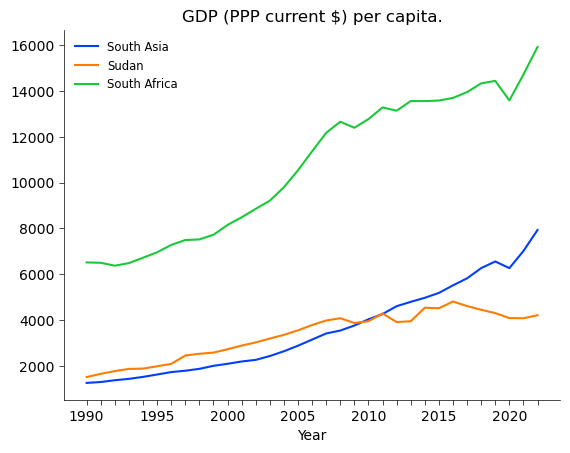

In [22]:
def gdp_plot(country_list):
    df = get_gdp_ppp(country_list)

    ax = sns.lineplot(
        data=df.sort_values("Year"),
        x="Year",
        y="GDP (PPP) per capita",
        hue="Economy",
        palette="bright",
    )

    # Customize plot
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    spine_width = 0.5

    for spine in ax.spines.values():
        spine.set_linewidth(spine_width)
    ax.tick_params(axis="both", width=spine_width)
    for ind, label in enumerate(ax.get_xticklabels()):
        label.set_visible(ind % 5 == 0)

    # Get handles and labels for the legend
    handles, labels = ax.get_legend_handles_labels()

    # Replace region codes with region names in legend labels
    for i, label in enumerate(labels):
        country_name = resolve_country_code(label)
        labels[i] = country_name

    # Update legend with modified labels
    ax.legend(
        handles,
        labels,
        loc="best",
        fontsize="small",
        frameon=False,
        fancybox=False,
    )

    ax.set_title("GDP (PPP current $) per capita.")
    ax.set_xlabel("Year")
    ax.set_ylabel("")
    return ax


gdp_plot(country_list)

In [ ]:
indicies = pd.DataFrame(wb.series.info(db=2).items)
indicies_dict = pd.Series(indicies.value.values,index=indicies.id).to_dict()
indicies_list = [{'label': label, 'value': value} for value, label in indicies_dict.items()]

with open("data/WDI.txt", "w") as output:
    output.write(str(indicies_list))